<a href="https://colab.research.google.com/github/pwy7fv/DS-4002-Group-Projects/blob/main/Scripts/Scraping_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/pwy7fv/DS-4002-Group-Projects

Cloning into 'DS-4002-Group-Projects'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


**The Fast and the Furious(2001) User Movie Reviews from IMDb**

> Add blockquote




In [ ]:
import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt0232500/reviews/?ref_=tt_ururv_sm'
raw = requests.get(url,headers=header) # Get page

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="ipc-html-content-inner-div")

In [ ]:
for listing in listings:
  print(listings)

<div class="ipc-html-content-inner-div" role="presentation">Is it cheesy ? Definitely. Is it corny ? Oh ya. Did anyone deserve an Oscar? What do you think.<br/><br/>Is it a cultural icon that has had a decades long lasting impact on pop culture worth your time ? ABSOLUTELY.<br/><br/>Back in 2001 this movie was the next big thing. Everyone wanted a graphic'd out rice burner to drive around town in pretending they street raced.<br/><br/>Everyone wanted a Mia or Letty. Everyone wanted to have Dom's muscles and Brian's hair.<br/><br/>There's not enough to say about how this movie changed everyone in 2001. Just watch it yourself and put yourself in the mindset of 2001.</div>
<div class="ipc-html-content-inner-div" role="presentation">Every summer a film comes around that takes everyone by surprise.  Last year it was Scary Movie and I'm sure in 1977 it was a film like Star Wars and then in 1981 it was Raiders of the Lost Ark.  Now I am not saying that The Fast and the Furious is in the same 

Extraction with metadata + date so ETA is easier

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt0232500/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        print(f"Author: {author}")
        print(f"Rating: {rating}/10")
        print(f"Title: {title}")
        print(f"Review Text: {review_text}")
        print(f"Date: {date}")
        # print(f"Helpful Votes: {helpful_votes}")
        print("-" * 50)
else:
    print("No reviews found.")


Author: bhester0806
Rating: 7/10
Title: Nostalgia train
Review Text: Is it cheesy ? Definitely. Is it corny ? Oh ya. Did anyone deserve an Oscar? What do you think.Is it a cultural icon that has had a decades long lasting impact on pop culture worth your time ? ABSOLUTELY.Back in 2001 this movie was the next big thing. Everyone wanted a graphic'd out rice burner to drive around town in pretending they street raced.Everyone wanted a Mia or Letty. Everyone wanted to have Dom's muscles and Brian's hair.There's not enough to say about how this movie changed everyone in 2001. Just watch it yourself and put yourself in the mindset of 2001.
Date: Feb 27, 2021
--------------------------------------------------
Author: baumer
Rating: 8/10
Title: There's something about Vin
Review Text: Every summer a film comes around that takes everyone by surprise.  Last year it was Scary Movie and I'm sure in 1977 it was a film like Star Wars and then in 1981 it was Raiders of the Lost Ark.  Now I am not say

Creating a DataFrame

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt0232500/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

FF1review_data = []

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        FF1review_data.append({
            "Author": author,
            "Rating": rating,
            "Title": title,
            "Review Text": review_text,
            "Date": date,
            # "Helpful Votes": helpful_votes
        })

else:
    print("No reviews found.")

#create dateframe
df1 = pd.DataFrame(FF1review_data)
print(df1.head())



        Author Rating                           Title  \
0  bhester0806      7                 Nostalgia train   
1       baumer      8     There's something about Vin   
2     Maniac-9      8         The beginning of it all   
3   Vartiainen      7               Surprisingly good   
4        zetes      7  A lot of fun (SLIGHT SPOILERS)   

                                         Review Text          Date  
0  Is it cheesy ? Definitely. Is it corny ? Oh ya...  Feb 27, 2021  
1  Every summer a film comes around that takes ev...  Jun 24, 2001  
2  This is the movie that created a brand new meg...  Jan 17, 2013  
3  Officer Brian O'Conner (Paul Walker) goes unde...   May 3, 2020  
4                                     No review text   Jan 3, 2002  


In [ ]:
df1.to_csv("/content/FF1_reviews.csv", index=False)

**2 Fast 2 Furious(2003) User Movie Reviews from IMDb**

> Add blockquote






In [ ]:
import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt0322259/reviews/?ref_=tt_ururv_sm'
raw = requests.get(url,headers=header) # Get page

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="ipc-html-content-inner-div")

print(listings)

[<div class="ipc-html-content-inner-div" role="presentation">What made the first "The Fast and the Furious" movie attracted fans besides the bad ass cars and competition on the streets was Vin Diesel's appearance as Dominic Toretta, a hotshot race driver who makes his money racing others in the streets; he was a rising star on the fame after doing such flicks such as "Saving Private Ryan", "The Iron Giant" and later doing "XXX".<br/><br/>At the end of the first movie, Vin's character Dominic flees away to Mexico where he wouldn't be in this sequel.<br/><br/>No matter, the series continues on.<br/><br/>"2 Fast 2 Furious" has Paul Walker reprising his role as Brian O'Conner, the one time agent who betrayed the enforcement agency by letting Dominic get away, is now a fugitive and being in a race competitions every night to make money. After being captured by the police, Brian is given a choice in either going to jail or helped the people he once work for in taking down a drug cartel deale

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt0322259/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        print(f"Author: {author}")
        print(f"Rating: {rating}/10")
        print(f"Title: {title}")
        print(f"Review Text: {review_text}")
        print(f"Date: {date}")
        # print(f"Helpful Votes: {helpful_votes}")
        print("-" * 50)
else:
    print("No reviews found.")

Author: departed07
Rating: 7/10
Title: Despite Vin Diesel's absence, the sequel's still solid.
Review Text: What made the first "The Fast and the Furious" movie attracted fans besides the bad ass cars and competition on the streets was Vin Diesel's appearance as Dominic Toretta, a hotshot race driver who makes his money racing others in the streets; he was a rising star on the fame after doing such flicks such as "Saving Private Ryan", "The Iron Giant" and later doing "XXX".At the end of the first movie, Vin's character Dominic flees away to Mexico where he wouldn't be in this sequel.No matter, the series continues on."2 Fast 2 Furious" has Paul Walker reprising his role as Brian O'Conner, the one time agent who betrayed the enforcement agency by letting Dominic get away, is now a fugitive and being in a race competitions every night to make money. After being captured by the police, Brian is given a choice in either going to jail or helped the people he once work for in taking down a 

**Create DataFrame**

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt0322259/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

FF2review_data = []

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        FF2review_data.append({
            "Author": author,
            "Rating": rating,
            "Title": title,
            "Review Text": review_text,
            "Date": date,
            # "Helpful Votes": helpful_votes
        })

else:
    print("No reviews found.")

#create dateframe
df2 = pd.DataFrame(FF2review_data)
print(df2.head())


                           Author     Rating  \
0                      departed07          7   
1                       BearGlove          7   
2  breakdownthatfilm-blogspot-com          6   
3                   daniel_velker  No rating   
4                   ethanbresnett          7   

                                               Title  \
0  Despite Vin Diesel's absence, the sequel's sti...   
1                          2 Fast but not so Furious   
2   Almost as equally entertaining as the first film   
3  2 times the fast 2 times the furious but still...   
4    A film that maybe deserves a little more credit   

                                         Review Text          Date  
0  What made the first "The Fast and the Furious"...  Aug 14, 2008  
1                                     No review text  May 27, 2013  
2  With the help of Paul Walker and Vin Diesel's ...  Feb 27, 2014  
3  This film brings back more of what we loved fr...  May 22, 2013  
4  Undoubtedly this sequel su



```
# This is formatted as code
```

**The Fast and Furious: Tokyo Drift(2006) User Movie Reviews from IMDb**


In [ ]:
import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt0463985/reviews/?ref_=tt_ururv_sm'
raw = requests.get(url,headers=header) # Get page

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="ipc-html-content-inner-div")

print(listings)

[<div class="ipc-html-content-inner-div" role="presentation">Look behind the woeful accent and this is actually a good movie. The first F&amp;F was about racing, then went all Miami Vice. A final return to the street racing scene had to move away from the original cast as they had lost their 'From the streets' appeal.<br/><br/>Anyway back to this, some sweet cars that aren't the massively expensive hyper cars of later episodes and some trick driving to boot.<br/><br/>A quality film if you manage to watch it a couple of times and don't dwell on the accent.</div>, <div class="ipc-html-content-inner-div" role="presentation">The first film was BREAK POINT with cars. The second one was Miami VICE with cars. This is REBEL WITHOUT A CAUSE... with more cars. To be honest, I kinda liked this one better than the last two, despite Lucas Black somehow beating Paul Walker as the least charismatic actor in a starring role. What I mainly like is the direction by Justin Lin. The focus on police underc

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt0463985/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        print(f"Author: {author}")
        print(f"Rating: {rating}/10")
        print(f"Title: {title}")
        print(f"Review Text: {review_text}")
        print(f"Date: {date}")
        # print(f"Helpful Votes: {helpful_votes}")
        print("-" * 50)
else:
    print("No reviews found.")

Author: sarnieken
Rating: 7/10
Title: The last one about actual racing?
Review Text: Look behind the woeful accent and this is actually a good movie. The first F&F was about racing, then went all Miami Vice. A final return to the street racing scene had to move away from the original cast as they had lost their 'From the streets' appeal.Anyway back to this, some sweet cars that aren't the massively expensive hyper cars of later episodes and some trick driving to boot.A quality film if you manage to watch it a couple of times and don't dwell on the accent.
Date: Mar 27, 2021
--------------------------------------------------
Author: tmm_8705
Rating: 7/10
Title: For the most part a good car action flick.
Review Text: The first film was BREAK POINT with cars. The second one was Miami VICE with cars. This is REBEL WITHOUT A CAUSE... with more cars. To be honest, I kinda liked this one better than the last two, despite Lucas Black somehow beating Paul Walker as the least charismatic actor i

**Create DataFrame**

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt0463985/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

FF3review_data = []

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        FF3review_data.append({
            "Author": author,
            "Rating": rating,
            "Title": title,
            "Review Text": review_text,
            "Date": date,
            # "Helpful Votes": helpful_votes
        })

else:
    print("No reviews found.")

#create dateframe
df3 = pd.DataFrame(FF3review_data)
print(df3.head())


          Author Rating                                              Title  \
0      sarnieken      7                  The last one about actual racing?   
1       tmm_8705      7         For the most part a good car action flick.   
2  accidentalist      7      Surprisingly good - Sung Kang steals the show   
3      ma-cortes      6  The drivers, the cars and the Drift races are ...   
4    andykhiem87      7  Decent, Hardly any substance, But Sometime to ...   

                                         Review Text          Date  
0  Look behind the woeful accent and this is actu...  Mar 27, 2021  
1  The first film was BREAK POINT with cars. The ...  Jun 27, 2013  
2                                     No review text  Jun 13, 2006  
3  This is an exciting narration of drifting auto...   Apr 7, 2008  
4  What can I say about this movie that many have...  Jul 31, 2006  


**Fast and Furious(2009) User Movie Reviews from IMDb**

> Add blockquote



In [ ]:
import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt1013752/reviews/?ref_=tt_ururv_sm'
raw = requests.get(url,headers=header) # Get page

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="ipc-html-content-inner-div")

print(listings)

[<div class="ipc-html-content-inner-div" role="presentation">Dom Toretto (Vin Diesel) and Letty (Michelle Rodriguez) have escaped to the Dominican Republic and resume their criminal ways. However when the cops close in on Dom, he decides to leave everything behind including Letty. Later he finds that Letty has been killed while working for drug baron Braga who is using street racers to drive his drugs across the border. Only he doesn't know that Letty was working for Brian O'Conner (Paul Walker) as an informant. Now Dom and Brian are both trying to get Braga by infiltrating his group as drivers.<br/><br/>The family is back and the movie is so much the better for it. Director Justin Lin returns after Tokyo Drift. The franchise really missed the presence of Vin Diesel. The only minor disappointment are the car chases. They're good but just not great. They can be better. It's also sad to lose Letty so early on in the movie. It misses her energy.</div>, <div class="ipc-html-content-inner-d

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt1013752/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        print(f"Author: {author}")
        print(f"Rating: {rating}/10")
        print(f"Title: {title}")
        print(f"Review Text: {review_text}")
        print(f"Date: {date}")
        # print(f"Helpful Votes: {helpful_votes}")
        print("-" * 50)
else:
    print("No reviews found.")

Author: C-Younkin
Rating: 7/10
Title: Still fast, still furious
Review Text: No review text
Date: Mar 30, 2009
--------------------------------------------------
Author: SnoopyStyle
Rating: 7/10
Title: The Family is back and the franchise is Saved!
Review Text: Dom Toretto (Vin Diesel) and Letty (Michelle Rodriguez) have escaped to the Dominican Republic and resume their criminal ways. However when the cops close in on Dom, he decides to leave everything behind including Letty. Later he finds that Letty has been killed while working for drug baron Braga who is using street racers to drive his drugs across the border. Only he doesn't know that Letty was working for Brian O'Conner (Paul Walker) as an informant. Now Dom and Brian are both trying to get Braga by infiltrating his group as drivers.The family is back and the movie is so much the better for it. Director Justin Lin returns after Tokyo Drift. The franchise really missed the presence of Vin Diesel. The only minor disappointment a

**Create DataFrame**

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt1013752/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

FF4review_data = []

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        FF4review_data.append({
            "Author": author,
            "Rating": rating,
            "Title": title,
            "Review Text": review_text,
            "Date": date,
            # "Helpful Votes": helpful_votes
        })

else:
    print("No reviews found.")

#create dateframe
df4 = pd.DataFrame(FF4review_data)
print(df4.head())


             Author Rating                                           Title  \
0         C-Younkin      7                       Still fast, still furious   
1       SnoopyStyle      7  The Family is back and the franchise is Saved!   
2  claudio_carvalho      7                                 Great Adventure   
3        joshrortiz      7                      It's nice to have you back   
4        phatrick88      7                The best of the series by a mile   

                                         Review Text          Date  
0                                     No review text  Mar 30, 2009  
1  Dom Toretto (Vin Diesel) and Letty (Michelle R...  Feb 22, 2014  
2  When Dominic Toretto (Vin Diesel) is informed ...  Dec 11, 2009  
3                                     No review text  May 26, 2013  
4                                     No review text   Apr 2, 2009  


[link text](https:// [link text](https://))**Fast Five(2011) User Moview Reviews from IMDb**

In [ ]:
import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt1596343/reviews/?ref_=tt_ururv_sm'
raw = requests.get(url,headers=header) # Get page

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="ipc-html-content-inner-div")

print(listings)

[<div class="ipc-html-content-inner-div" role="presentation">This is the film that single-handedly got me to give the rest of the series a shot, for better or worse. It's a nice change of pace from the previous films where it abandons the street race angle (how far could you have taken that anyway?) and goes into the direction of a heist action flick with cars. Dwayne Johnson is a great addition and really adds to the series embracing the goofiness of its premise. So yeah, still the best this franchise had, and that's kind of rare for a franchise on its fifth film. The action for the most part is really handled well and a lot of fun to watch. The cast as an ensemble are very charismatic which no doubt makes it more fun for audiences to see a cast that has so much diversity and it's not done with generic stereotypes but just a bunch of people with a common interest. Overall a very entertaining action flick.</div>, <div class="ipc-html-content-inner-div" role="presentation">Now when a lo

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt1596343/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        print(f"Author: {author}")
        print(f"Rating: {rating}/10")
        print(f"Title: {title}")
        print(f"Review Text: {review_text}")
        print(f"Date: {date}")
        # print(f"Helpful Votes: {helpful_votes}")
        print("-" * 50)
else:
    print("No reviews found.")

Author: tmm_8705
Rating: 8/10
Title: So far the best and most entertaining of this series.
Review Text: This is the film that single-handedly got me to give the rest of the series a shot, for better or worse. It's a nice change of pace from the previous films where it abandons the street race angle (how far could you have taken that anyway?) and goes into the direction of a heist action flick with cars. Dwayne Johnson is a great addition and really adds to the series embracing the goofiness of its premise. So yeah, still the best this franchise had, and that's kind of rare for a franchise on its fifth film. The action for the most part is really handled well and a lot of fun to watch. The cast as an ensemble are very charismatic which no doubt makes it more fun for audiences to see a cast that has so much diversity and it's not done with generic stereotypes but just a bunch of people with a common interest. Overall a very entertaining action flick.
Date: Jun 27, 2013
------------------

**Create DataFrame**

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt1596343/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

FF5review_data = []

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        FF5review_data.append({
            "Author": author,
            "Rating": rating,
            "Title": title,
            "Review Text": review_text,
            "Date": date,
            # "Helpful Votes": helpful_votes
        })

else:
    print("No reviews found.")

#create dateframe
df5 = pd.DataFrame(FF5review_data)
print(df5.head())


       Author     Rating                                              Title  \
0    tmm_8705          8  So far the best and most entertaining of this ...   
1    Terryfan          8                       Back together for round Five   
2  eric262003          8            Sequels Are Getting Better Through Time   
3          0U  No rating                          Best Fast & Furious movie   
4       tilak          7                                       A fun 'RIDE'   

                                         Review Text          Date  
0  This is the film that single-handedly got me t...  Jun 27, 2013  
1  Now when a long running series like The Fast A...   Apr 2, 2015  
2                                     No review text  Apr 22, 2012  
3  This is the best Fast and furious movie in my ...  Feb 22, 2020  
4                                     No review text   Mar 6, 2014  


**Fast and Furious 6(2013) User Movie

1.   List item
2.   List item

Reviews from IMDb**

In [ ]:
import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt1905041/reviews/?ref_=tt_ururv_sm'
raw = requests.get(url,headers=header) # Get page

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="ipc-html-content-inner-div")

print(listings)

[<div class="ipc-html-content-inner-div" role="presentation">I don't think many other franchises has been as turbulent and uneven as The Fast and the Furious films. Things started off pretty earnestly with Rob Cohen's first film, but quickly careened into odd directions, with the ever-cheesy 2 Fast 2 Furious taking off and running with one main character while leaving the other in the dust, and with Tokyo Drift drifting away with totally different characters altogether. Thankfully, Fast &amp; Furious realigned the series with its roots. But it wasn't until Fast Five when I really began to give a darn about this series. Granted that all films have had their fun moments, the fifth film magically tied in every single strand from every single film, and made every single character relevant. Best of all, it did so with a great sense of fun: it had great pacing, amusing comedy, great action, and it made the characters stand out as a collectively outstanding cast.<br/><br/>So now Fast &amp; Fu

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt1905041/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        print(f"Author: {author}")
        print(f"Rating: {rating}/10")
        print(f"Title: {title}")
        print(f"Review Text: {review_text}")
        print(f"Date: {date}")
        # print(f"Helpful Votes: {helpful_votes}")
        print("-" * 50)
else:
    print("No reviews found.")

Author: Al_The_Strange
Rating: 8/10
Title: "This is vehicular warfare."
Review Text: I don't think many other franchises has been as turbulent and uneven as The Fast and the Furious films. Things started off pretty earnestly with Rob Cohen's first film, but quickly careened into odd directions, with the ever-cheesy 2 Fast 2 Furious taking off and running with one main character while leaving the other in the dust, and with Tokyo Drift drifting away with totally different characters altogether. Thankfully, Fast & Furious realigned the series with its roots. But it wasn't until Fast Five when I really began to give a darn about this series. Granted that all films have had their fun moments, the fifth film magically tied in every single strand from every single film, and made every single character relevant. Best of all, it did so with a great sense of fun: it had great pacing, amusing comedy, great action, and it made the characters stand out as a collectively outstanding cast.So now Fas

**Create DataFrame**

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt1905041/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

FF6review_data = []

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        FF6review_data.append({
            "Author": author,
            "Rating": rating,
            "Title": title,
            "Review Text": review_text,
            "Date": date,
            # "Helpful Votes": helpful_votes
        })

else:
    print("No reviews found.")

#create dateframe
df6 = pd.DataFrame(FF6review_data)
print(df6.head())


           Author     Rating  \
0  Al_The_Strange          8   
1       pablo2896          8   
2       FeastMode          8   
3     CinemaClown  No rating   
4     moviewizguy          7   

                                               Title  \
0                       "This is vehicular warfare."   
1                        A big movie and a fun time!   
2                                            BEASTLY   
3  Builds Upon The Winning Blockbuster Formula Of...   
4                                      Movin' on up!   

                                         Review Text          Date  
0  I don't think many other franchises has been a...  May 23, 2013  
1  Well, this was unexpected! Going into this fil...  May 23, 2013  
2                                     No review text  Jun 24, 2019  
3  The sixth instalment in The Fast and the Furio...   Sep 3, 2015  
4  While most franchises lose their steam with ea...  May 15, 2013  


**Furious 7(2015) User Movie Reviews from IMDb**

In [ ]:
import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt2820852/reviews/?ref_=tt_ururv_sm'
raw = requests.get(url,headers=header) # Get page

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="ipc-html-content-inner-div")

print(listings)

[<div class="ipc-html-content-inner-div" role="presentation">Perhaps Furious 7 wouldn't have that Box Office success and Popularity if the sudden death of one the main protagonists, Paul Walker AKA Brian O'Conner wouldn't have gotten in the way.<br/><br/>But this is how it is. The heartbreaking death of Paul in that terrible car crash has made this movie so special to the heart of the long standing fans. The script can be so cliché and full of inconsistencies, this movie is the last film of Paul Walker and will always be.<br/><br/>But what makes me to give that high note is the ending scene and the awesome tribute the rest of the fast and furious 'familia' made to Paul. They could have gotten his character to die like we have seen so many times in the past. Instead the scriptwriters rewrote the script to make a celebration of life and family.<br/><br/>In fact, This entire saga is more about family than cars. Cars and race are just the theme and the objects attracting our attention. But

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt2820852/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        print(f"Author: {author}")
        print(f"Rating: {rating}/10")
        print(f"Title: {title}")
        print(f"Review Text: {review_text}")
        print(f"Date: {date}")
        # print(f"Helpful Votes: {helpful_votes}")
        print("-" * 50)
else:
    print("No reviews found.")

Author: boyznick
Rating: 8/10
Title: For Paul
Review Text: No review text
Date: Aug 19, 2015
--------------------------------------------------
Author: Njkinny
Rating: 8/10
Title: Fast & Furious 7 ~A memorable One Last Ride!
Review Text: No review text
Date: Aug 12, 2015
--------------------------------------------------
Author: amir_ro88
Rating: 8/10
Title: You Need To Abandon The World's Logic To Enjoy This
Review Text: No review text
Date: Apr 28, 2015
--------------------------------------------------
Author: AmyJenson1995
Rating: 9/10
Title: For Paul and the family
Review Text: Perhaps Furious 7 wouldn't have that Box Office success and Popularity if the sudden death of one the main protagonists, Paul Walker AKA Brian O'Conner wouldn't have gotten in the way.But this is how it is. The heartbreaking death of Paul in that terrible car crash has made this movie so special to the heart of the long standing fans. The script can be so cliché and full of inconsistencies, this movie is th

**Create DataFrame**

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt2820852/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

FF7review_data = []

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        FF7review_data.append({
            "Author": author,
            "Rating": rating,
            "Title": title,
            "Review Text": review_text,
            "Date": date,
            # "Helpful Votes": helpful_votes
        })

else:
    print("No reviews found.")

#create dateframe
df7 = pd.DataFrame(FF7review_data)
print(df7.head())


                     Author     Rating  \
0                  boyznick          8   
1                   Njkinny          8   
2                 amir_ro88          8   
3             AmyJenson1995          9   
4  eduardoskelly-252-683387  No rating   

                                               Title  \
0                                           For Paul   
1       Fast & Furious 7 ~A memorable One Last Ride!   
2  You Need To Abandon The World's Logic To Enjoy...   
3                            For Paul and the family   
4                                It was a good movie   

                                         Review Text          Date  
0                                     No review text  Aug 19, 2015  
1                                     No review text  Aug 12, 2015  
2                                     No review text  Apr 28, 2015  
3  Perhaps Furious 7 wouldn't have that Box Offic...  Oct 16, 2015  
4                                     No review text  Apr 29, 201

**Stop Here, rest of movies not relased w/in time frame**



:** The Fate of the Furious(2017) User Moview Reviews from IMDb**



In [ ]:
import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt4630562/reviews/?ref_=tt_ururv_sm'
raw = requests.get(url,headers=header) # Get page

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="ipc-html-content-inner-div")

print(listings)

[<div class="ipc-html-content-inner-div" role="presentation">The action is fine (although it is a Transformers, Michael Bay kind of action), but that script, oh my god the script is so cheesy... This thing about cyber terrorism where everyone is a hacker, but no one uses a mouse on a computer, they all just type in front of a holographic screen with moving images from a Star Trek movie. It is just getting old. Enough with the "lets hack into a network of satellites in 10 seconds".<br/><br/>The characters have no real spunk behind them, they just appear, because they have to. The motives of the villain are silly and unclear, the villains henchmen are targets for shooting practice. The last couple FF movies were much much better in terms of story, still over the top action, but they had some feeling.<br/><br/>This one is just a flick for children, it's slow motion fx, big "really big" explosions, lots of good quality cgi, and fitting for a kids movie not a drop of blood.<br/><br/>I give 

**F9: The Fast Saga(2021) User Movie Reviews from IMDb**

In [ ]:
import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt5433138/reviews/?ref_=tt_ururv_sm'
raw = requests.get(url,headers=header) # Get page

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="ipc-html-content-inner-div")

print(listings)

[<div class="ipc-html-content-inner-div" role="presentation">It's not terrible, you just have to be okay with remembering it's a senseless movie. I agree with most of the crappy ratings but I do think it's still an entertaining movie.<br/><br/>I was laughing so hard just 20 minutes in, looking at how fake and unrealistic it was, but then what else would you expect from a fast and furious movie these days. After seeing the previous two movies, nothing surprised me, not even the illogical stunts they pulled. Though they overdid themselves this time, you really need to shut your brain off to enjoy this one because they've turned a racing movie into a superhero movie now. Almost nothing makes sense in the plot or the science behind the action sequences.</div>, <div class="ipc-html-content-inner-div" role="presentation">As Tej (played by Ludacris) says in the movie: "as long as we obey the laws of physics, then we'll be fine, okay?"<br/><br/>Yeah, that concept is right out the window in thi

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt0463985/reviews/?ref_=tt_ururv_sm'

# Get page content using requests
raw = requests.get(url, headers=header)

# Parse content with BeautifulSoup
bsObj = soup(raw.content, 'html.parser')

# Find all review listings
listings = bsObj.find_all(class_="sc-7d2e5b85-1 cvfQlw user-review-item")

# Check if we have any reviews
if listings:
    for listing in listings:
        # Extract rating
        rating_tag = listing.find('span', class_="ipc-rating-star--rating")
        rating = rating_tag.text.strip() if rating_tag else "No rating"

        # Extract review title
        title_tag = listing.find('h3', class_="ipc-title__text")
        title = title_tag.text.strip() if title_tag else "No title"

        # Extract review text
        review_text_tag = listing.find('div', class_="ipc-html-content-inner-div")
        review_text = review_text_tag.text.strip() if review_text_tag else "No review text"

        # Extract author name
        author_tag = listing.find('a', class_="ipc-link--base")
        author = author_tag.text.strip() if author_tag else "Unknown author"

        # Extract review date
        date_tag = listing.find('li', class_="review-date")
        date = date_tag.text.strip() if date_tag else "No date"

        # # Extract helpful votes
        # helpful_tag = listing.find('span', class_="ipc-voting__label__count ipc-voting__label__count--up")
        # helpful_votes = helpful_tag.text.strip() if helpful_tag else "0"

        # Print the extracted information
        print(f"Author: {author}")
        print(f"Rating: {rating}/10")
        print(f"Title: {title}")
        print(f"Review Text: {review_text}")
        print(f"Date: {date}")
        # print(f"Helpful Votes: {helpful_votes}")
        print("-" * 50)
else:
    print("No reviews found.")

**Fast X(2023) User Movie Reviews from IMDb**

In [ ]:
import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.imdb.com/title/tt5433140/?ref_=fn_all_ttl_1'
raw = requests.get(url,headers=header) # Get page

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="ipc-html-content-inner-div")

print(listings)

[<div class="ipc-html-content-inner-div" role="presentation">The word family is said 56 times in this film.</div>, <div class="ipc-html-content-inner-div" role="presentation">Lifts cannot fail in the way shown. The instant the tension in the cables drops the brakes engage and the car is then held in place by it's own weight. The lift would have dropped a few feet at most and more likely only inches.</div>, <div class="ipc-html-content-inner-div" role="presentation"><p><span class="sc-d69d23c3-0 cEMNwo stage-direction">[from trailer] </span></p><p><a aria-disabled="false" class="ipc-link ipc-link--base" href="/name/nm0000234/?ref_=tt_dyk_qu" tabindex="0">Cipher</a>: <span class="sc-d69d23c3-0 cEMNwo stage-direction">[waking up on operating table alongside Letty] </span>Good morning, sunshine.</p><p><a aria-disabled="false" class="ipc-link ipc-link--base" href="/name/nm0735442/?ref_=tt_dyk_qu" tabindex="0">Letty Ortiz</a>: You gotta be kidding me.</p></div>, <div class="ipc-html-content-

**Plots**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

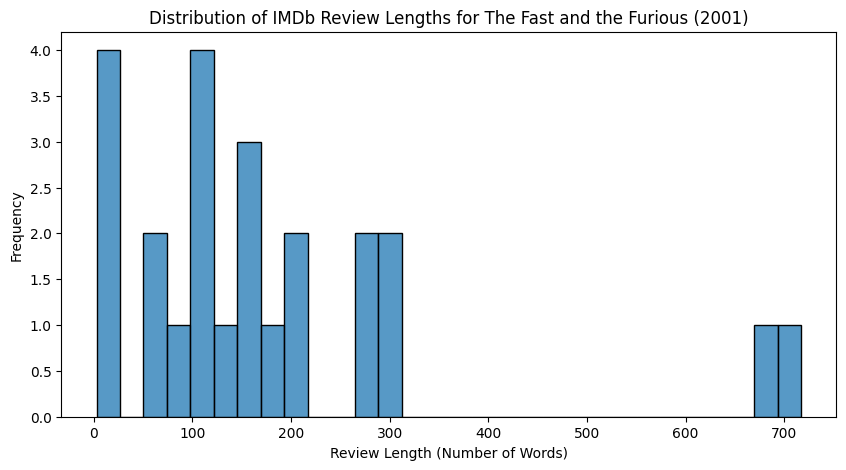

In [ ]:
# Convert "Date" column to datetime format
df1["Date"] = pd.to_datetime(df1["Date"], errors='coerce')  # Convert text to date format

# Calculate review length (word count)
df1["Review Length"] = df1["Review Text"].astype(str).apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10, 5))
sns.histplot(df1["Review Length"], bins=30)
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Distribution of IMDb Review Lengths for The Fast and the Furious (2001)")
plt.show()